SISMOLOGIA

Grupo # 1

- Yareth Burbano
- Juan Diego Florez Vera
- Ayda Milena Bernal
- Manuela Sánchez
- Marcela Toloza
- Camilo Garcia

# escenario

No hay establecidos patrones que permitan definir la producción de sismos en un tiempo determinado.<br>

# Background



¿Qué caracteristicas perimten establecer los patrones con que se producen un sismos en un periodo determinado de tiempo?

In [2]:
!pip install astrotools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.9/18.9 MB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 29.9 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import astropy.units as u
from astropy.time import Time
import astrotools
import folium
from folium.plugins import HeatMap

que caracteristicas permiten establecer la probabilidad de que se produzca un sismo en un periodo determinado de tiempo?

In [42]:
df=pd.read_csv("Sismos_significativos_Global.csv")
#df.iloc[3378] # --> para mostrar los datos de una fila completa
df.head(8)

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
5,01/10/1965,13:36:32,-13.405,166.629,Earthquake,35.0,NaN,NaN,6.7,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860922,ISCGEM,ISCGEM,ISCGEM,Automatic
6,01/12/1965,13:32:25,27.357,87.867,Earthquake,20.0,NaN,NaN,5.9,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM861007,ISCGEM,ISCGEM,ISCGEM,Automatic
7,01/15/1965,23:17:42,-13.309,166.212,Earthquake,35.0,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM861111,ISCGEM,ISCGEM,ISCGEM,Automatic


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

# EDA

Vamos a escoger las variables de interes y las guardamos en un lista llamada variables_a_utilizar

In [44]:
variables_a_utilizar=["Date","Time","Latitude","Longitude","Type","Depth","Magnitude"]
df_filtrado=df[variables_a_utilizar]
df_filtrado.head()

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,6.0
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,5.8
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,6.2
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,5.8
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,5.8


vemos los datos no nulos que tiene el dataset

In [45]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       23412 non-null  object 
 1   Time       23412 non-null  object 
 2   Latitude   23412 non-null  float64
 3   Longitude  23412 non-null  float64
 4   Type       23412 non-null  object 
 5   Depth      23412 non-null  float64
 6   Magnitude  23412 non-null  float64
dtypes: float64(4), object(3)
memory usage: 1.3+ MB


vamos a comprobar que la columna "Date" esté en el formato dd/mm/AA

In [46]:
# esto es para mirar los datos que están defectuosos
indice=0
filas_a_eliminar=[]
for i in df_filtrado["Date"]:
  if(not(i[2]=="/" and i[5]=="/")):
    print(f"el dato con el indice {indice} está defectuosos")
    filas_a_eliminar.append(indice)
  indice+=1

el dato con el indice 3378 está defectuosos
el dato con el indice 7512 está defectuosos
el dato con el indice 20650 está defectuosos


In [47]:
df_filtrado=df_filtrado.drop(filas_a_eliminar,axis=0) #eliminando datos defectuosos
df_filtrado.reset_index(inplace=True, drop=True) #reacomodar los indices de los datos del dataframe df_filtrado

In [48]:
# comprobar la eliminación de datos defectuosos
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23409 entries, 0 to 23408
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       23409 non-null  object 
 1   Time       23409 non-null  object 
 2   Latitude   23409 non-null  float64
 3   Longitude  23409 non-null  float64
 4   Type       23409 non-null  object 
 5   Depth      23409 non-null  float64
 6   Magnitude  23409 non-null  float64
dtypes: float64(4), object(3)
memory usage: 1.3+ MB


In [49]:
# para ver que tipo de variable es
info = df_filtrado.dtypes
res = dict((key, "numerica") if value == "float64" else (key, "categorica") for key, value in info.items())
pd.DataFrame(res.items(), columns=["columna", "tipo"])

,columna,tipo
0,Date,categorica
1,Time,categorica
2,Latitude,numerica
3,Longitude,numerica
4,Type,categorica
5,Depth,numerica
6,Magnitude,numerica


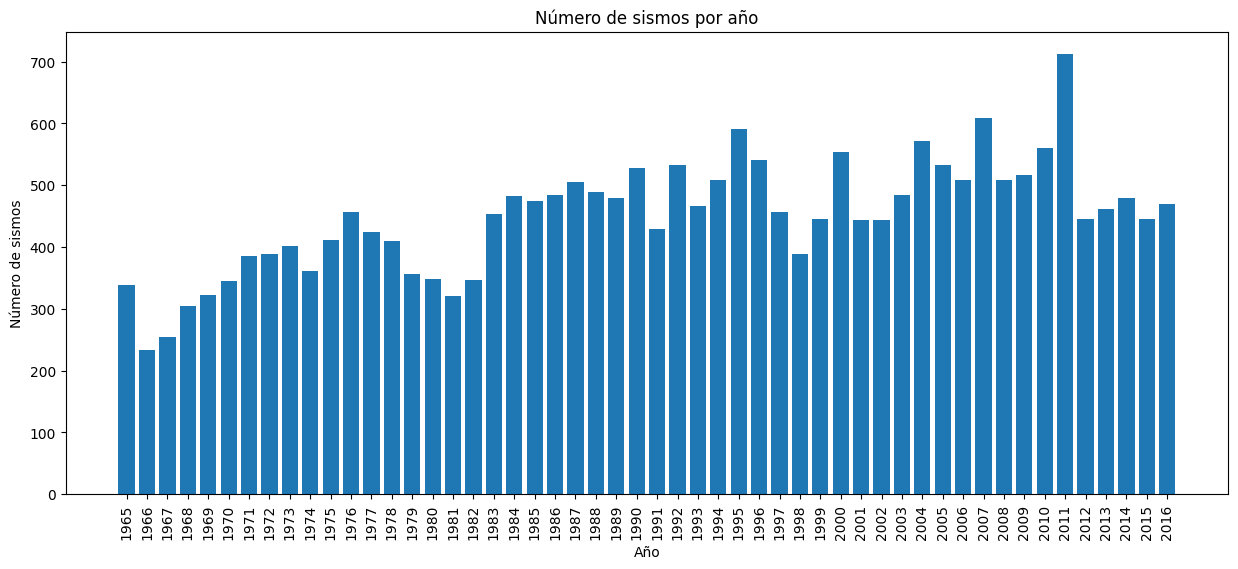

In [50]:
def contar_sismos_por_año(df, año):
  """
  Cuenta el número de sismos en un año determinado.

  Args:
      df: DataFrame con los datos de los sismos.
      año: Año a contar los sismos.

  Returns:
      int: Número de sismos en el año especificado.
  """

  # Filtrar el DataFrame por año
  df_año = df[df["Date"].str.contains(str(año))]

  # Contar el número de filas en el DataFrame filtrado
  num_sismos = len(df_año)

  return num_sismos

# Obtener los años únicos en el DataFrame
años_unicos = df_filtrado["Date"].str.split("/", expand=True)[2].unique()

# Crear un diccionario para almacenar el número de sismos por año
sismos_por_año = {}

# Recorrer los años únicos y contar los sismos en cada año
for año in años_unicos:
  sismos_por_año[año] = contar_sismos_por_año(df_filtrado, año)

# Crear un gráfico de barras
figure = plt.figure(figsize=(15, 6))
plt.bar(sismos_por_año.keys(), sismos_por_año.values())
plt.xlabel("Año")
plt.tick_params(axis="x",rotation=90)
plt.ylabel("Número de sismos")
plt.title("Número de sismos por año")
plt.show()


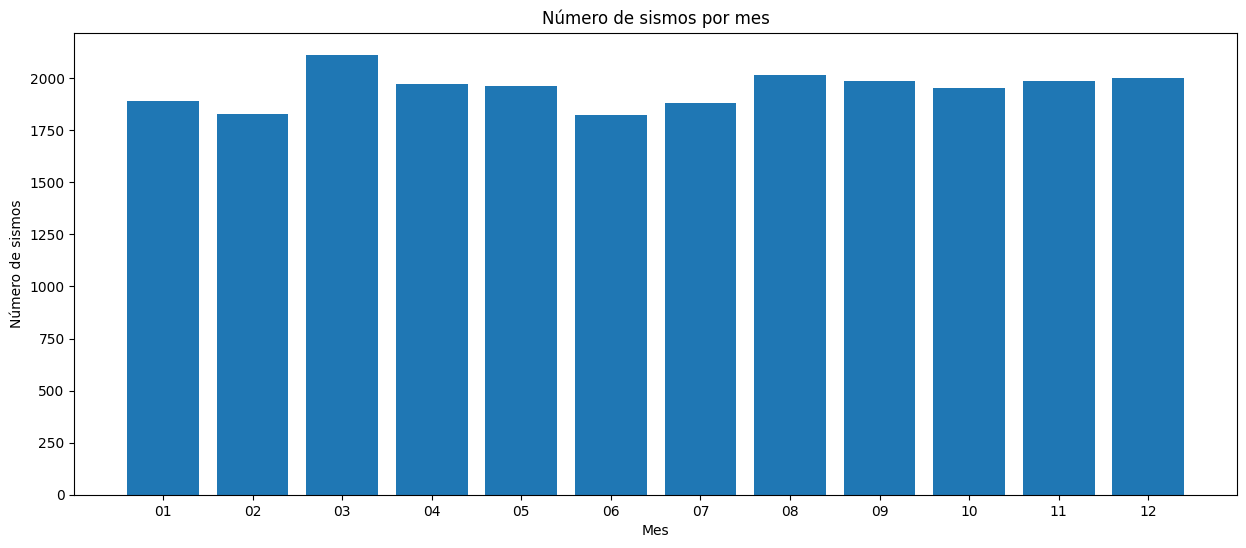

In [51]:

def contar_sismos_por_mes(df):
  """
  Cuenta el número de sismos en cada mes de todos los años.

  Args:
      df: DataFrame con los datos de los sismos.

  Returns:
      dict: Diccionario con los meses del año como claves y el número de sismos como valores.
  """

  # Obtener los meses únicos en el DataFrame
  meses_unicos = df_filtrado["Date"].str.split("/", expand=True)[0].unique()

  # Crear un diccionario para almacenar el número de sismos por mes
  sismos_por_mes = {}

  # Recorrer los meses únicos y contar los sismos en cada mes
  for mes in meses_unicos:
    sismos_por_mes[mes] = len(df_filtrado[df_filtrado["Date"].str.startswith(mes)])

  return sismos_por_mes

# Obtener el diccionario con los sismos por mes
sismos_por_mes = contar_sismos_por_mes(df_filtrado)

# Crear un gráfico de barras
figure = plt.figure(figsize=(15, 6))
plt.bar(sismos_por_mes.keys(), sismos_por_mes.values())
plt.xlabel("Mes")
plt.ylabel("Número de sismos")
plt.title("Número de sismos por mes")
plt.show()

#Clasificación de los sismos

* Sismos leves:

 * Magnitud Richter menor o igual a 5.0

* Sismos moderados:

  * Magnitud Richter entre 5.1 y 6.0

* Sismos fuertes:
  * Magnitud Richter entre 6.1 y 7.0

* Sismos muy fuertes:
  * Magnitud Richter mayor a 7.0

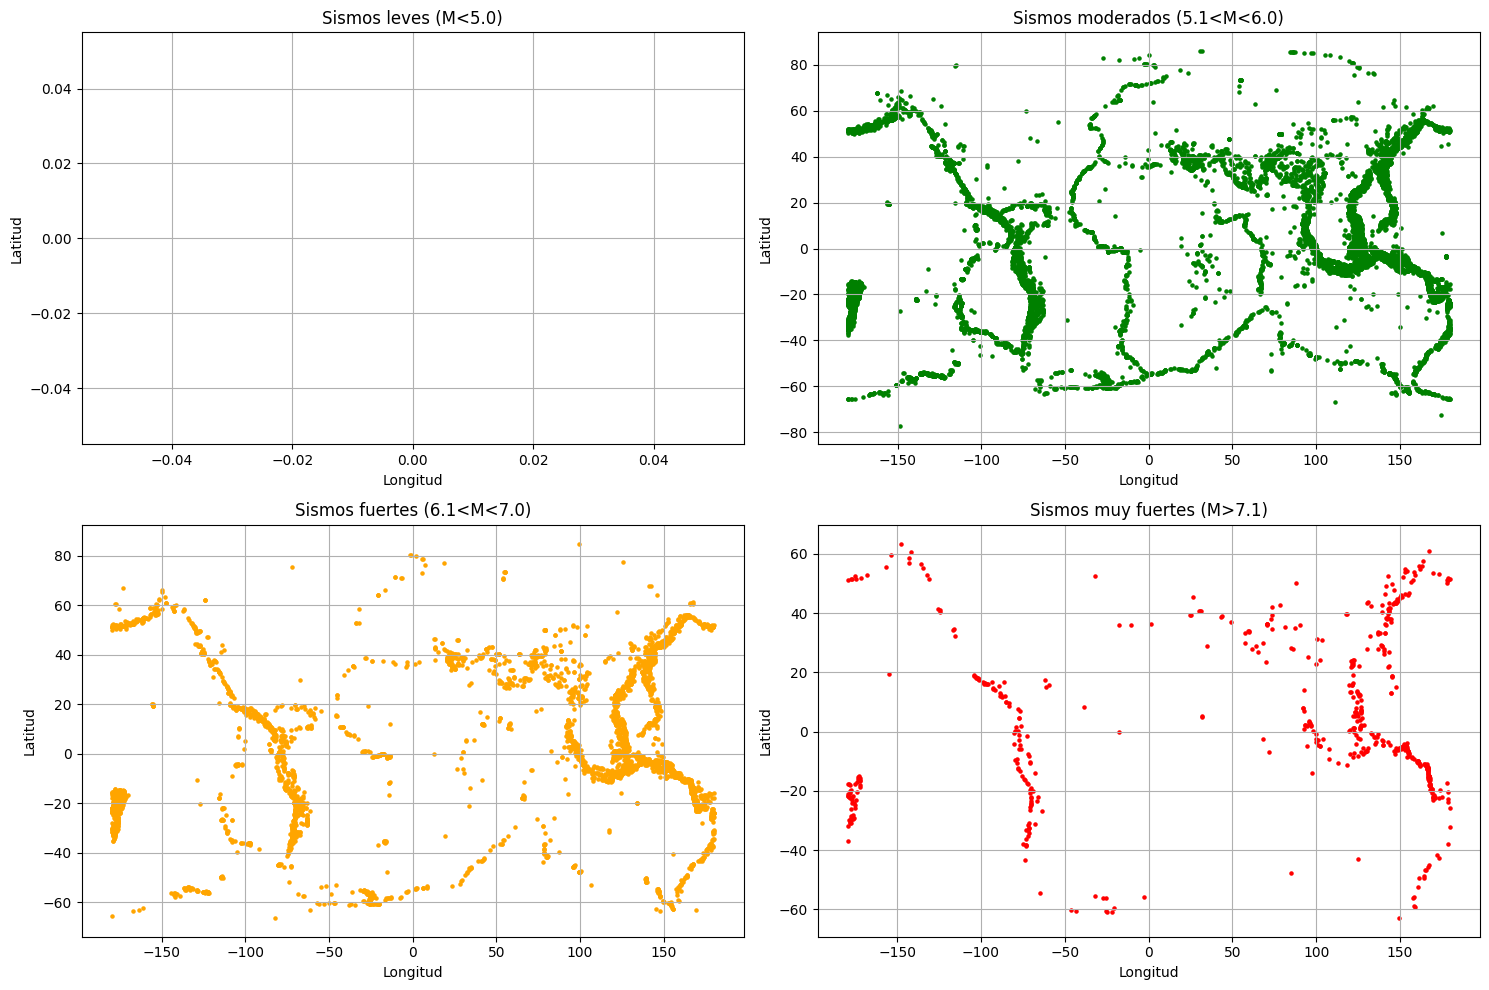

In [80]:
# Crear una figura con 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Filtrar los datos por magnitud
sismos_leves = df_filtrado[df_filtrado["Magnitude"] <= 5.0]
sismos_moderados = df_filtrado[(df_filtrado["Magnitude"] > 5.0) & (df_filtrado["Magnitude"] <= 6.0)]
sismos_fuertes = df_filtrado[(df_filtrado["Magnitude"] > 6.0) & (df_filtrado["Magnitude"] <= 7.0)]
sismos_muy_fuertes = df_filtrado[df_filtrado["Magnitude"] > 7.0]

# Graficar los puntos de latitud y longitud para cada tipo de sismo
axes[0, 0].scatter(sismos_leves["Longitude"], sismos_leves["Latitude"],color="blue",s=5)
axes[0, 0].set_title("Sismos leves (M<5.0)")
axes[0,0].set_xlabel("Longitud")
axes[0,0].set_ylabel("Latitud")
axes[0,0].grid()

axes[0, 1].scatter(sismos_moderados["Longitude"], sismos_moderados["Latitude"], color="green",s=5)
axes[0, 1].set_title("Sismos moderados (5.1<M<6.0)")
axes[0,1].set_xlabel("Longitud")
axes[0,1].set_ylabel("Latitud")
axes[0,1].grid()

axes[1, 0].scatter(sismos_fuertes["Longitude"], sismos_fuertes["Latitude"], color="orange",s=5)
axes[1, 0].set_title("Sismos fuertes (6.1<M<7.0)")
axes[1,0].set_xlabel("Longitud")
axes[1,0].set_ylabel("Latitud")
axes[1,0].grid()

axes[1, 1].scatter(sismos_muy_fuertes["Longitude"], sismos_muy_fuertes["Latitude"], color="red",s=5)
axes[1, 1].set_title("Sismos muy fuertes (M>7.1)")
axes[1,1].set_xlabel("Longitud")
axes[1,1].set_ylabel("Latitud")
axes[1,1].grid()

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar la figura

plt.show()


In [82]:
# Crear un nuevo DataFrame con el número de sismos por tipo
sismos_por_tipo = pd.DataFrame({
    "Tipo de sismo": ["Leves", "Moderados", "Fuertes", "Muy fuertes","Total"],
    "Número de sismos": [
        len(sismos_leves),
        len(sismos_moderados),
        len(sismos_fuertes),
        len(sismos_muy_fuertes),
        len(sismos_leves)+len(sismos_moderados)+len(sismos_fuertes)+len(sismos_muy_fuertes),
    ],
})

# Mostrar el DataFrame
sismos_por_tipo

,Tipo de sismo,Número de sismos
0,Leves,0
1,Moderados,17635
2,Fuertes,5204
3,Muy fuertes,570
4,Total,23409


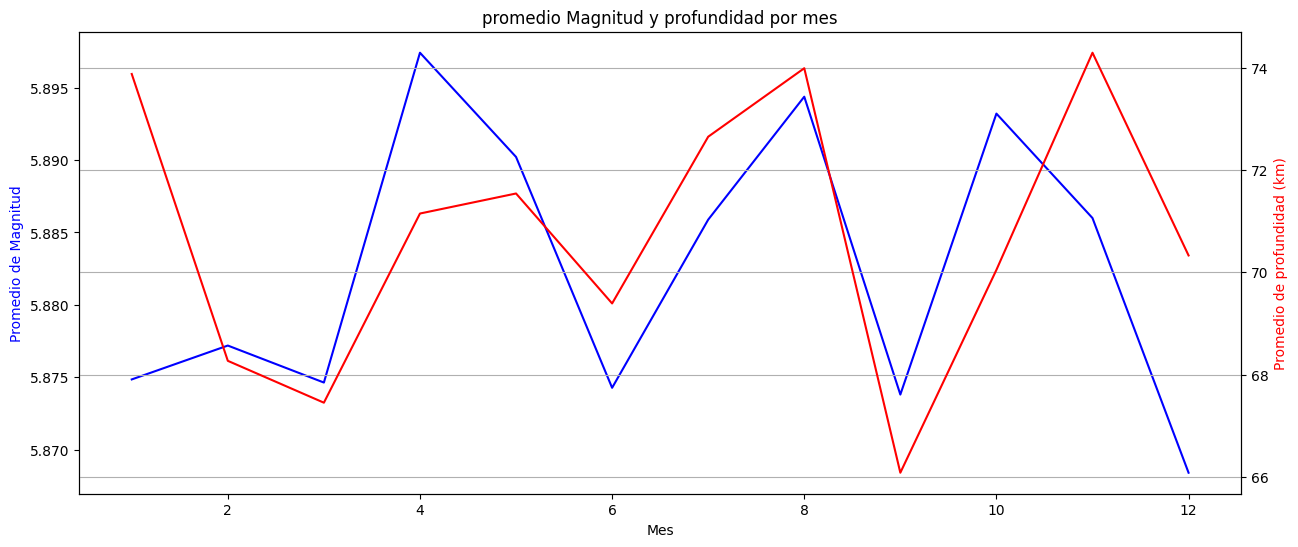

In [52]:
def calculate_monthly_averages(df):
  """
  Calculates the average magnitude and depth for each month.

  Args:
      df: DataFrame with the earthquake data.

  Returns:
      tuple: Two lists, one containing the average magnitudes for each month and one containing the average depths for each month.
  """

  # Initialize lists to store the averages
  average_magnitudes = []
  average_depths = []

  # Get unique months
  months = df_filtrado["Date"].str.split("/", expand=True)[0].unique()

  # Loop through each month
  for month in months:
    # Filter the DataFrame by month
    df_month = df_filtrado[df_filtrado["Date"].str.startswith(month)]

    # Calculate the average magnitude and depth for the month
    average_magnitude = df_month["Magnitude"].mean()
    average_depth = df_month["Depth"].mean()

    # Add the averages to the lists
    average_magnitudes.append(average_magnitude)
    average_depths.append(average_depth)

  return average_magnitudes, average_depths

# Calculate the monthly averages
average_magnitudes, average_depths = calculate_monthly_averages(df_filtrado)

# Create the figure and axes
fig, ax1 = plt.subplots(figsize=(15, 6))

# Plot the average magnitudes with the primary axis
ax1.plot(range(1, 13), average_magnitudes, label="Average Magnitude", color="blue")
ax1.set_xlabel("Mes")
ax1.set_ylabel("Promedio de Magnitud", color="blue")

# Create a secondary axis for the average depths
ax2 = ax1.twinx()

# Plot the average depths with the secondary axis
ax2.plot(range(1, 13), average_depths, label="Average Depth", color="red")
ax2.set_ylabel("Promedio de profundidad (km)", color="red")

# Set the title and show the legend
plt.title("promedio Magnitud y profundidad por mes")
plt.grid()
plt.show()


In [53]:
#escoger variables a utilizar del dataset

# vamos a serparar la hora de los minutos y segundos

"""
#forma alternativa
Time_horas=[]
for fecha in datos_de_la_matriz["Time"]:
  h=int(fecha[0:2])
  minu=int(fecha[3:5])
  seg=int(fecha[6:])
  Time_horas.append(h+minu/60+seg/3600)
"""
#convers
Time_horas=[int(fecha[0:2])+int(fecha[3:5])/60+int(fecha[6:])/3600 for fecha in df_filtrado["Time"]] #lista compresión

Date_J=[astrotools.coord.date_to_julian_day(int(fecha[6:]),int(fecha[0:2]),int(fecha[3:5])) for fecha in df_filtrado["Date"]]

df_filtrado["Date"]=Date_J
df_filtrado["Time"]=Time_horas
df_filtrado.head()

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude
0,2438763,13.738333,19.246,145.616,Earthquake,131.6,6.0
1,2438765,11.496944,1.863,127.352,Earthquake,80.0,5.8
2,2438766,18.099444,-20.579,-173.972,Earthquake,20.0,6.2
3,2438769,18.828611,-59.076,-23.557,Earthquake,15.0,5.8
4,2438770,13.547222,11.938,126.427,Earthquake,15.0,5.8


In [54]:
# para ver que tipo de variable es
info = df_filtrado.dtypes
res = dict((key, "numerica") if (value == "float64" or value=="int64") else (key, "categorica") for key, value in info.items())
pd.DataFrame(res.items(), columns=["columna", "tipo"])

,columna,tipo
0,Date,numerica
1,Time,numerica
2,Latitude,numerica
3,Longitude,numerica
4,Type,categorica
5,Depth,numerica
6,Magnitude,numerica


In [55]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23409 entries, 0 to 23408
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       23409 non-null  int64  
 1   Time       23409 non-null  float64
 2   Latitude   23409 non-null  float64
 3   Longitude  23409 non-null  float64
 4   Type       23409 non-null  object 
 5   Depth      23409 non-null  float64
 6   Magnitude  23409 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 1.3+ MB


In [56]:
df_filtrado.describe()

,Date,Time,Latitude,Longitude,Depth,Magnitude
count,2.340900e+04,23409.000000,23409.000000,23409.000000,23409.000000,23409.000000
mean,2.449037e+06,11.945328,1.678763,39.636726,70.748526,5.882558
std,5.269543e+03,6.896874,30.113379,125.514881,122.605748,0.423084
min,2.438763e+06,0.000833,-77.080000,-179.997000,-1.100000,5.500000
25%,2.444706e+06,5.978611,-18.652000,-76.352000,14.530000,5.600000
50%,2.449322e+06,11.915556,-3.569000,103.981000,33.000000,5.700000
75%,2.453623e+06,17.955278,26.188000,145.027000,54.000000,6.000000
max,2.457753e+06,23.999444,86.005000,179.998000,700.000000,9.100000


In [57]:
# elegir los datos para la matriz de confusión
def CV_df(df):
    df_numerico = df.select_dtypes(include='number') #seleccionar las variables que son numericas
    CV = {columna : (df_numerico[columna].std() * 100) / df_numerico[columna].mean() for columna in df_numerico.columns}
    CV = pd.DataFrame([CV], columns=df_numerico.columns)
    return CV
CV_df(df_filtrado)

,Date,Time,Latitude,Longitude,Depth,Magnitude
0,0.215168,57.737002,1793.783922,316.663092,173.297955,7.192183


Text(0.5, 1.0, 'Matriz de Correlación')

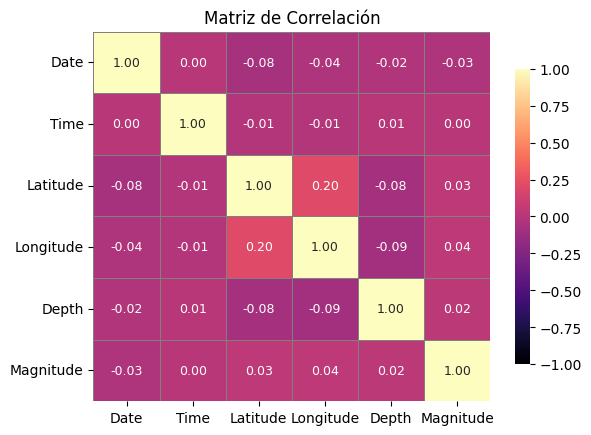

In [58]:
correlacion = df_filtrado.select_dtypes(include="number").corr()
sns.heatmap(data= correlacion,
            vmin = -1,
            vmax = 1,
            center = 0,
            annot = True,
            fmt=".2f",  # Formato de los números de correlación
            cmap="magma",  # Paleta de colores personalizada
            linewidths=0.5,  # Ancho de las líneas entre celdas
            linecolor='gray',  # Color de las líneas entre celdas
            annot_kws={"size": 9},  # Tamaño de los números de correlación
            cbar_kws={"shrink": 0.8})

plt.title('Matriz de Correlación')

In [69]:
# Crear el mapa
m = folium.Map()

# Normalizar los valores de Magnitude
df_filtrado_norma_Magnitud = (df_filtrado['Magnitude'] - df_filtrado['Magnitude'].min()) / (df_filtrado['Magnitude'].max() - df_filtrado['Magnitude'].min())

# Crear el mapa de calor
heat_data = [[lat, lon, mag] for lat, lon, mag in zip(df_filtrado['Latitude'],
                                                      df_filtrado['Longitude'],
                                                      df_filtrado_norma_Magnitud)]
heat_map = folium.plugins.HeatMap(heat_data,
                                  min_opacity=0.2,
                                  radius=8,
                                  blur=2,
                                  gradient={0.2: 'blue', 0.4: 'lime', 0.6: 'orange', 1.0: 'red'},
                                  overlay=True,
                                  control=True)
heat_map.add_to(m)

# Mostrar el mapa
m


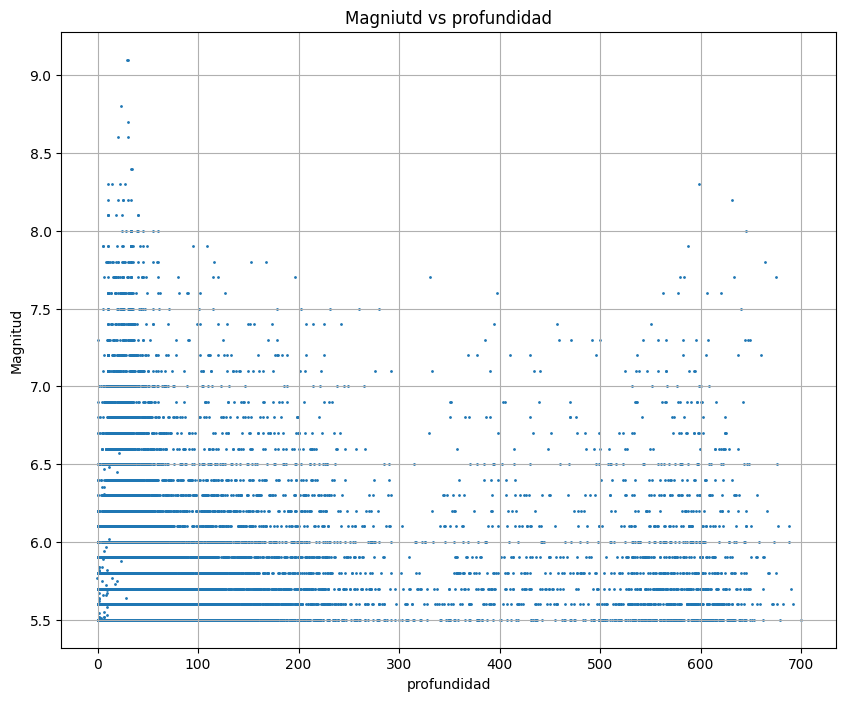

In [ ]:
# hacemos un reconocimiento de los datos

figure = plt.figure(figsize=(10,8))
plt.scatter(df_filtrado["Depth"],df_filtrado["Magnitude"],s=1)
plt.xlabel("profundidad")
plt.ylabel("Magnitud")
plt.title("Magniutd vs profundidad")
plt.grid()
plt.show()

In [ ]:
%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Crea arrays de NumPy para las coordenadas
x = np.array(df_filtrado["Latitude"])
y = np.array(df_filtrado["Longitude"])
z = np.array(df_filtrado["Magnitude"])

# Asegúrate de que las dimensiones coincidan
assert len(x) == len(y) == len(z)

# Crea una figura y un sub-eje 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Grafica los puntos en 3D usando 'o' para marcadores circulares
ax.scatter(x, y, z, s=2)

# Personaliza el gráfico (opcional)
ax.set_xlabel('Latitudd')
ax.set_ylabel('Longitud')
ax.set_zlabel('Magnitud')
ax.set_title('Gráfico de puntos 3D')

# Muestra el gráfico
plt.show()


# Hasta aquí termina el EDA

#Modelos de K-Means (sin estandarizar)

In [ ]:
X = np.zeros((df_filtrado.shape[0], 4))
X[:, 0], X[:, 1],X[:, 2], X[:, 3]= df_filtrado["Depth"],df_filtrado["Magnitude"],df_filtrado["Latitude"],df_filtrado["Longitude"]
X

array([[ 131.6   ,    6.    ,   19.246 ,  145.616 ],
       [  80.    ,    5.8   ,    1.863 ,  127.352 ],
       [  20.    ,    6.2   ,  -20.579 , -173.972 ],
       ...,
       [  10.    ,    5.9   ,   36.9179,  140.4262],
       [  79.    ,    6.3   ,   -9.0283,  118.6639],
       [  11.94  ,    5.5   ,   37.3973,  141.4103]])

In [ ]:
# prompt: haz un modelo de K-means con 5 Clusters con la matrix X en el cual los centroides colocalos en el centro de cada placa continental el modelo tiene que identificar las placas continental con los sismos que han ocurrido y grafica la longitud vs la latitud con los respectivos centroides y sus diferentes colores de para saber a que cluster pertenece

from sklearn.cluster import KMeans

initial_centroids = [
    [df_filtrado["Depth"].mean(),df_filtrado["Magnitude"].mean(),-60.0, -30.0],  # Coordenadas del centro de la primera placa
    [df_filtrado["Depth"].mean(),df_filtrado["Magnitude"].mean(),20.0, 10.0],    # Coordenadas del centro de la segunda placa
    [df_filtrado["Depth"].mean(),df_filtrado["Magnitude"].mean(),80.0, 40.0],    # Coordenadas del centro de la tercera placa
    [df_filtrado["Depth"].mean(),df_filtrado["Magnitude"].mean(),140.0, -10.0],  # Coordenadas del centro de la cuarta placa
    [df_filtrado["Depth"].mean(),df_filtrado["Magnitude"].mean(),-140.0, 60.0]   # Coordenadas del centro de la quinta placa
]

# Create a KMeans model with 5 clusters
kmeans = KMeans(n_clusters=5, init=np.array(initial_centroids), n_init=1)

# Fit the model to the data
kmeans.fit(X)

# Get the cluster centroids
centroids = kmeans.cluster_centers_

# Get the cluster labels
labels = kmeans.labels_


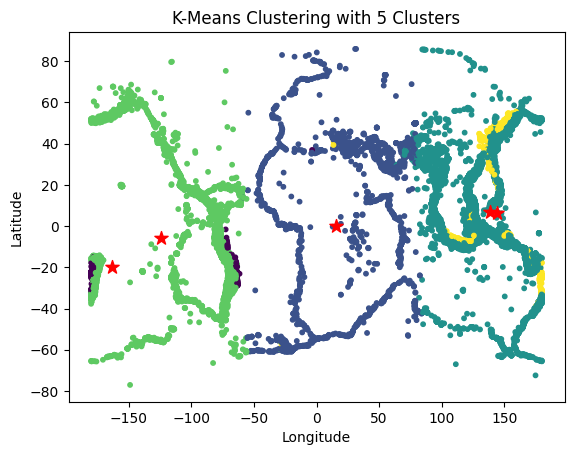

In [ ]:
# Create a figure and axes
fig, ax = plt.subplots()

# Plot the data points
ax.scatter(X[:, 3], X[:, 2], c=labels, s=10)

# Plot the centroids
ax.scatter(centroids[:, 3], centroids[:, 2], marker='*', s=100, c='red')

# Set the labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('K-Means Clustering with 5 Clusters')

# Show the plot
plt.show()

# Modelo de DBSCAN (Density-Based Spatial Clustering of Applications with Noise) Agrupamiento espacial basado en la densidad de aplicaciones con ruido (en español)

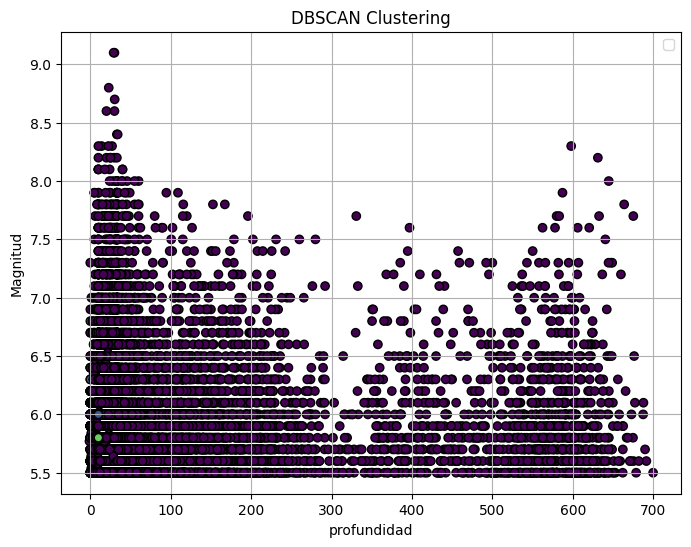

In [ ]:
# Inicializar DBSCAN con los parámetros eps y min_samples
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.8, min_samples=10)

# Aplicar DBSCAN a los datos de ejemplo
dbscan.fit(X)

# Obtener las etiquetas de los clusters asignadas por DBSCAN
labels = dbscan.labels_

# Visualizar los resultados de DBSCAN
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', edgecolors='black')
plt.title('DBSCAN Clustering')
plt.xlabel('profundidad')
plt.ylabel('Magnitud')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
np.unique(labels)

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126])

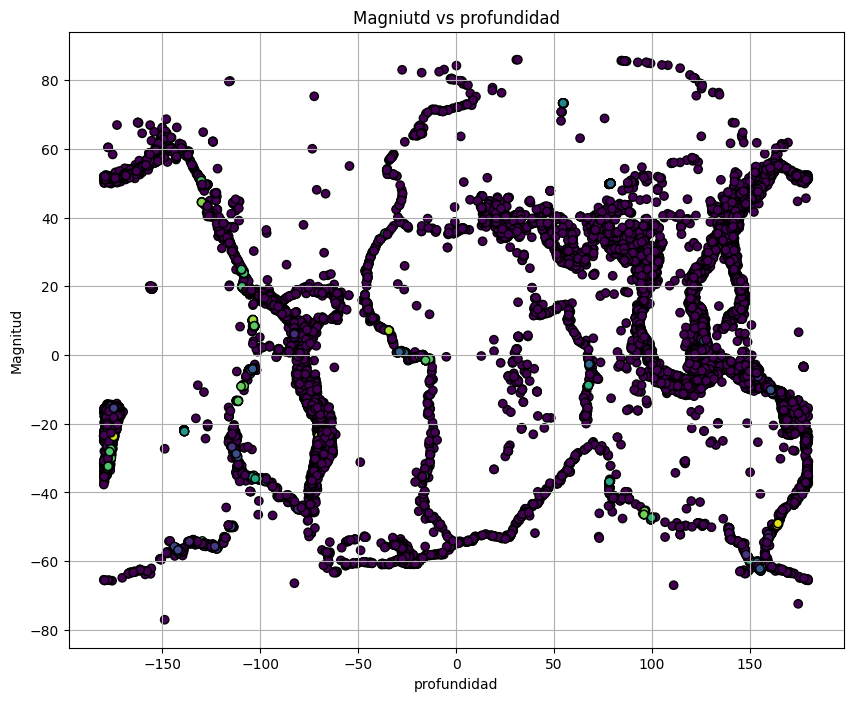

In [ ]:
figure = plt.figure(figsize=(10,8))
plt.scatter(df_filtrado["Longitude"],df_filtrado["Latitude"],c=labels, cmap='viridis', marker='o', edgecolors='black')
plt.xlabel("profundidad")
plt.ylabel("Magnitud")
plt.title("Magniutd vs profundidad")
plt.grid()
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler


# Separa las variables numéricas
columnas_numericas = ["Date","Latitude","Longitude","Time","Depth","Magnitude"]

# Crea una instancia de StandardScaler
scaler = StandardScaler()

# Estandariza las variables numéricas
data_escalado = scaler.fit_transform(df_filtrado[columnas_numericas])

# Crea un nuevo DataFrame con las variables escaladas
data_escalado_df = pd.DataFrame(data_escalado, columns=columnas_numericas)
data_escalado_df["Magnitude"] = df_filtrado["Magnitude"]

In [ ]:
print(np.count_nonzero(np.isnan(df_filtrado["Magnitude"])))
print(np.count_nonzero(np.isnan(data_escalado_df["Magnitude"])))

0
0


In [ ]:
X_stand = np.zeros((df_filtrado.shape[0], 4))
X_stand[:, 0], X_stand[:, 1], X_stand[:, 2], X_stand[:, 3]= data_escalado_df["Depth"],data_escalado_df["Magnitude"],data_escalado_df["Latitude"],data_escalado_df["Longitude"]
X_stand

array([[ 4.96328884e-01,  6.00000000e+00,  5.83382307e-01,
         8.44374289e-01],
       [ 7.54587128e-02,  5.80000000e+00,  6.11824568e-03,
         6.98858554e-01],
       [-4.13925208e-01,  6.20000000e+00, -7.39147822e-01,
        -1.70189612e+00],
       ...,
       [-4.95489195e-01,  5.90000000e+00,  1.17024032e+00,
         8.03025321e-01],
       [ 6.73023141e-02,  6.30000000e+00, -3.55565932e-01,
         6.29637395e-01],
       [-4.79665781e-01,  5.50000000e+00,  1.18616049e+00,
         8.10865993e-01]])

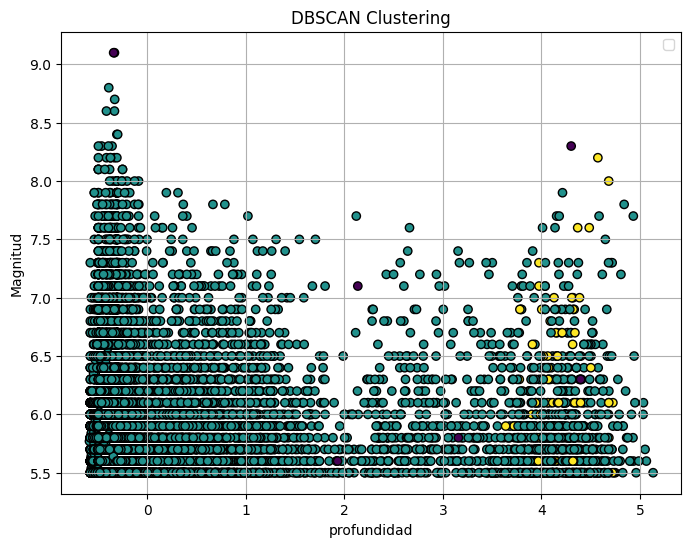

In [ ]:
# Inicializar DBSCAN con los parámetros eps y min_samples
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.8, min_samples=10)

# Aplicar DBSCAN a los datos de ejemplo
dbscan.fit(X_stand)

# Obtener las etiquetas de los clusters asignadas por DBSCAN
labels = dbscan.labels_

# Visualizar los resultados de DBSCAN
plt.figure(figsize=(8, 6))
plt.scatter(X_stand[:, 0], X_stand[:, 1], c=labels, cmap='viridis', marker='o', edgecolors='black')
plt.title('DBSCAN Clustering')
plt.xlabel('profundidad')
plt.ylabel('Magnitud')
plt.grid(True)
plt.legend()
plt.show()


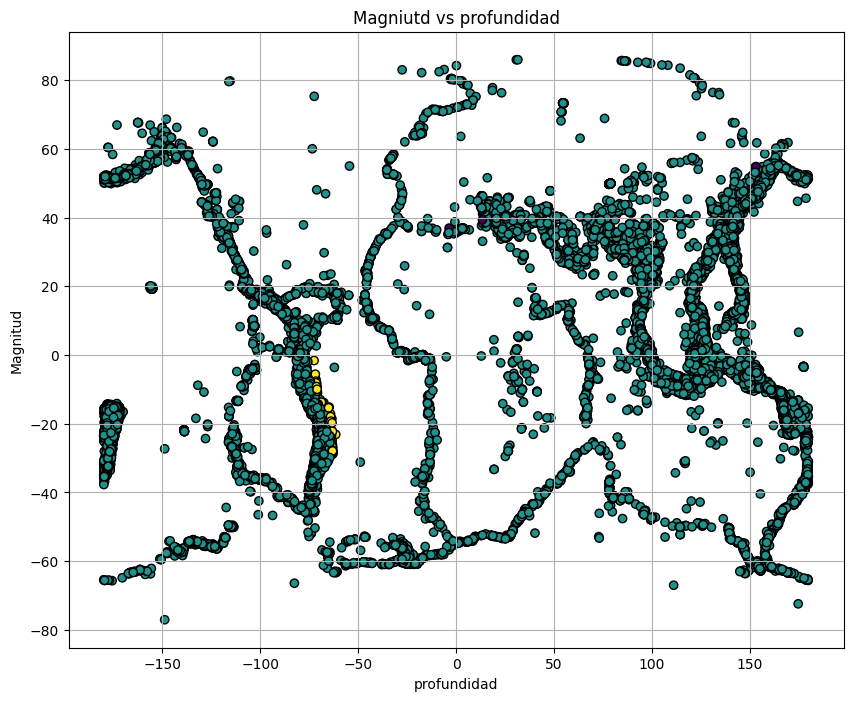

In [ ]:
figure = plt.figure(figsize=(10,8))
plt.scatter(df_filtrado["Longitude"],df_filtrado["Latitude"],c=labels, cmap='viridis', marker='o', edgecolors='black')
plt.xlabel("profundidad")
plt.ylabel("Magnitud")
plt.title("Magniutd vs profundidad")
plt.grid()
plt.show()